In [1]:
import pandas as pd
import numpy as np
from pymatgen.core import Composition
from sklearn.ensemble import VotingClassifier
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset": 'stix',
    "font.family": 'sans-serif',
    "font.sans-serif": ['Times New Roman'],
    "font.size": 24,
    'axes.unicode_minus': False
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (8, 6),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
seed = 42

In [2]:
df01= pd.read_csv('./Data/New_Eg_6.6w.csv')
df01

,formula,hse_fold0,hse_fold1,hse_fold2,hse_fold3,hse_fold4,mean_hse,mean_eh,A_Density,B_Density,X_Density,B_dipole Polarizability,A_number of Valence Electrons,X_number of Valence Electrons,B_number,A_number of s+p Electrons,B_number of s+p Electrons,X_number of s+p Electrons,A_number of d Electrons,X_number of d Electrons,avg ionic char,B_Electronegativity,mean
0,Cs0.47Rb0.53Ca1Cl3,5.809389,5.248012,6.039049,5.751761,5.965189,5.762680,0.107727,1.6898,1.5400,0.00963,160.80,1.0,21.0,20.00,1.0,2.00,21.0,0.0,0.0,0.172973,1.0000,5.891347
1,Cs0.47Rb0.53Sr1Cl3,5.700661,5.061179,5.825304,5.644604,5.909904,5.628331,0.057384,1.6898,2.6400,0.00963,197.20,1.0,21.0,38.00,1.0,2.00,21.0,0.0,0.0,0.174792,0.9500,5.770118
2,Cs0.47Rb0.53Mn1Cl3,2.738756,2.699255,2.715833,2.640517,2.822403,2.723353,0.013267,1.6898,7.4400,0.00963,68.00,1.0,21.0,25.00,1.0,2.00,21.0,0.0,0.0,0.152377,1.5500,2.698590
3,Cs0.47Rb0.53Fe1Cl3,2.821851,2.349560,3.023580,2.866029,0.000000,2.212204,0.080834,1.6898,7.8700,0.00963,62.00,1.0,21.0,26.00,1.0,2.00,21.0,0.0,0.0,0.142088,1.8300,2.765255
4,Cs0.47Rb0.53Pd1Cl3,0.000000,2.958490,0.000000,3.009616,3.122243,1.818070,0.034107,1.6898,12.0000,0.00963,26.14,1.0,21.0,46.00,1.0,0.00,21.0,0.0,0.0,0.130062,2.2000,3.030116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65956,Rb1V0.49Sn0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070500,1.5300,6.7118,9.36000,69.66,1.0,21.0,36.77,1.0,3.02,21.0,0.0,0.0,0.125254,1.7983,0.000000
65957,Rb1V0.49Pb0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063449,1.5300,8.7569,9.36000,66.60,1.0,21.0,53.09,1.0,3.02,21.0,0.0,0.0,0.121586,1.9870,0.000000
65958,Rb1Eu0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064295,1.5300,5.6663,9.36000,136.47,1.0,21.0,43.40,1.0,2.00,21.0,0.0,0.0,0.139952,1.4107,0.000000
65959,Rb1Tm0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036594,1.5300,7.7471,9.36000,116.07,1.0,21.0,46.46,1.0,2.00,21.0,0.0,0.0,0.138803,1.4362,0.000000


In [3]:
df01['Metal_or_not'] = df01['mean'].apply(lambda x: 0 if x <= 0.1 else 1)
df01

,formula,hse_fold0,hse_fold1,hse_fold2,hse_fold3,hse_fold4,mean_hse,mean_eh,A_Density,B_Density,X_Density,B_dipole Polarizability,A_number of Valence Electrons,X_number of Valence Electrons,B_number,A_number of s+p Electrons,B_number of s+p Electrons,X_number of s+p Electrons,A_number of d Electrons,X_number of d Electrons,avg ionic char,B_Electronegativity,mean,Metal_or_not
0,Cs0.47Rb0.53Ca1Cl3,5.809389,5.248012,6.039049,5.751761,5.965189,5.762680,0.107727,1.6898,1.5400,0.00963,160.80,1.0,21.0,20.00,1.0,2.00,21.0,0.0,0.0,0.172973,1.0000,5.891347,1
1,Cs0.47Rb0.53Sr1Cl3,5.700661,5.061179,5.825304,5.644604,5.909904,5.628331,0.057384,1.6898,2.6400,0.00963,197.20,1.0,21.0,38.00,1.0,2.00,21.0,0.0,0.0,0.174792,0.9500,5.770118,1
2,Cs0.47Rb0.53Mn1Cl3,2.738756,2.699255,2.715833,2.640517,2.822403,2.723353,0.013267,1.6898,7.4400,0.00963,68.00,1.0,21.0,25.00,1.0,2.00,21.0,0.0,0.0,0.152377,1.5500,2.698590,1
3,Cs0.47Rb0.53Fe1Cl3,2.821851,2.349560,3.023580,2.866029,0.000000,2.212204,0.080834,1.6898,7.8700,0.00963,62.00,1.0,21.0,26.00,1.0,2.00,21.0,0.0,0.0,0.142088,1.8300,2.765255,1
4,Cs0.47Rb0.53Pd1Cl3,0.000000,2.958490,0.000000,3.009616,3.122243,1.818070,0.034107,1.6898,12.0000,0.00963,26.14,1.0,21.0,46.00,1.0,0.00,21.0,0.0,0.0,0.130062,2.2000,3.030116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65956,Rb1V0.49Sn0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070500,1.5300,6.7118,9.36000,69.66,1.0,21.0,36.77,1.0,3.02,21.0,0.0,0.0,0.125254,1.7983,0.000000,0
65957,Rb1V0.49Pb0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063449,1.5300,8.7569,9.36000,66.60,1.0,21.0,53.09,1.0,3.02,21.0,0.0,0.0,0.121586,1.9870,0.000000,0
65958,Rb1Eu0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064295,1.5300,5.6663,9.36000,136.47,1.0,21.0,43.40,1.0,2.00,21.0,0.0,0.0,0.139952,1.4107,0.000000,0
65959,Rb1Tm0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036594,1.5300,7.7471,9.36000,116.07,1.0,21.0,46.46,1.0,2.00,21.0,0.0,0.0,0.138803,1.4362,0.000000,0


In [4]:
from sklearn.model_selection import train_test_split
X = df01.iloc[:, 8:-2]
y = df01['Metal_or_not']
y.value_counts()

1    49861
0    16100
Name: Metal_or_not, dtype: int64

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X_train.shape,X_test.shape)

(52768, 14) (13193, 14)


In [6]:
print(y_train.shape,y_test.shape)

(52768,) (13193,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(n_jobs=-1,random_state=42)
model.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = model.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(model,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(model,X_embedded,y_train,cv=5,scoring="roc_auc",n_jobs=9).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 14/14 [00:27<00:00,  1.98s/it]


,col,score,n_features
0,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
1,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
2,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
3,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
4,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
5,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.969553,9
6,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.967697,8
7,"Index(['A_Density', 'B_Density', 'B_dipole Pol...",0.970194,7
8,"Index(['B_Density', 'B_dipole Polarizability',...",0.968486,6
9,"Index(['B_Density', 'B_dipole Polarizability',...",0.965384,5


In [8]:
to_select = result.sort_values(by='score',ascending=False)
feature_labels = to_select[to_select['n_features']==4]['col'].values[0]
X_train = X.loc[X_train.index][feature_labels]
X_test = X.loc[X_test.index][feature_labels]
X_train.shape, X_test.shape

((52768, 4), (13193, 4))

In [9]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_indices = kf.split(X_train,y_train)

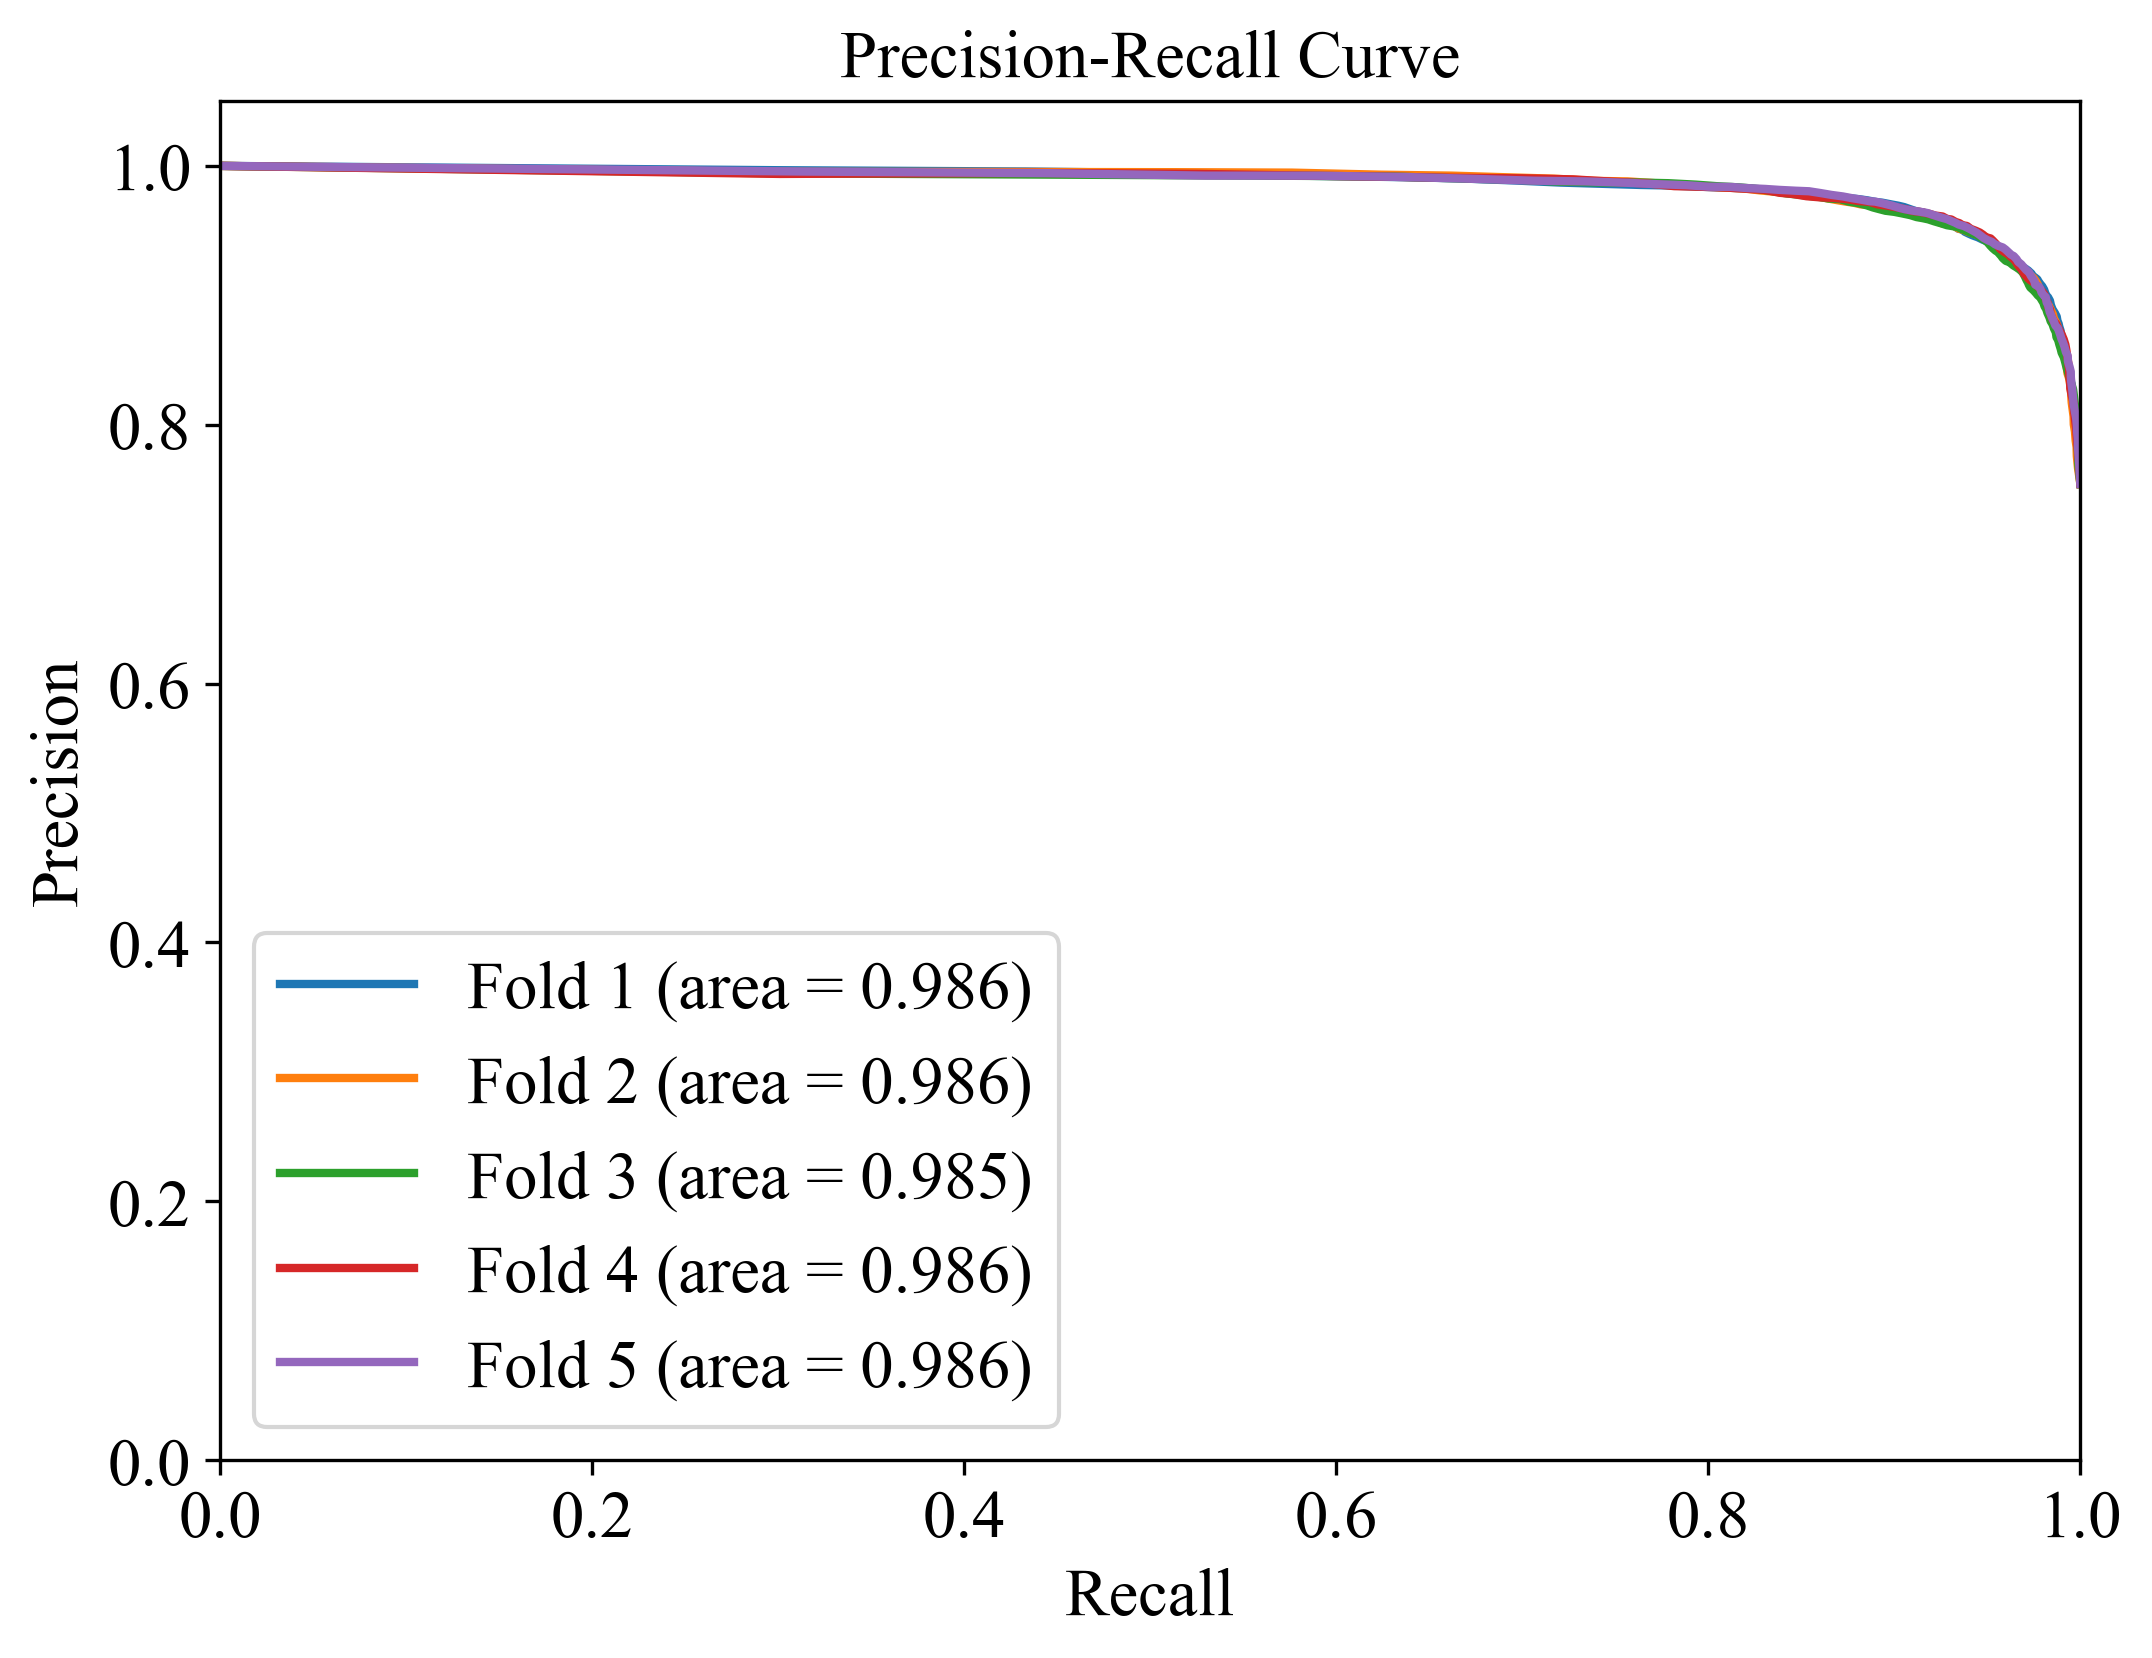

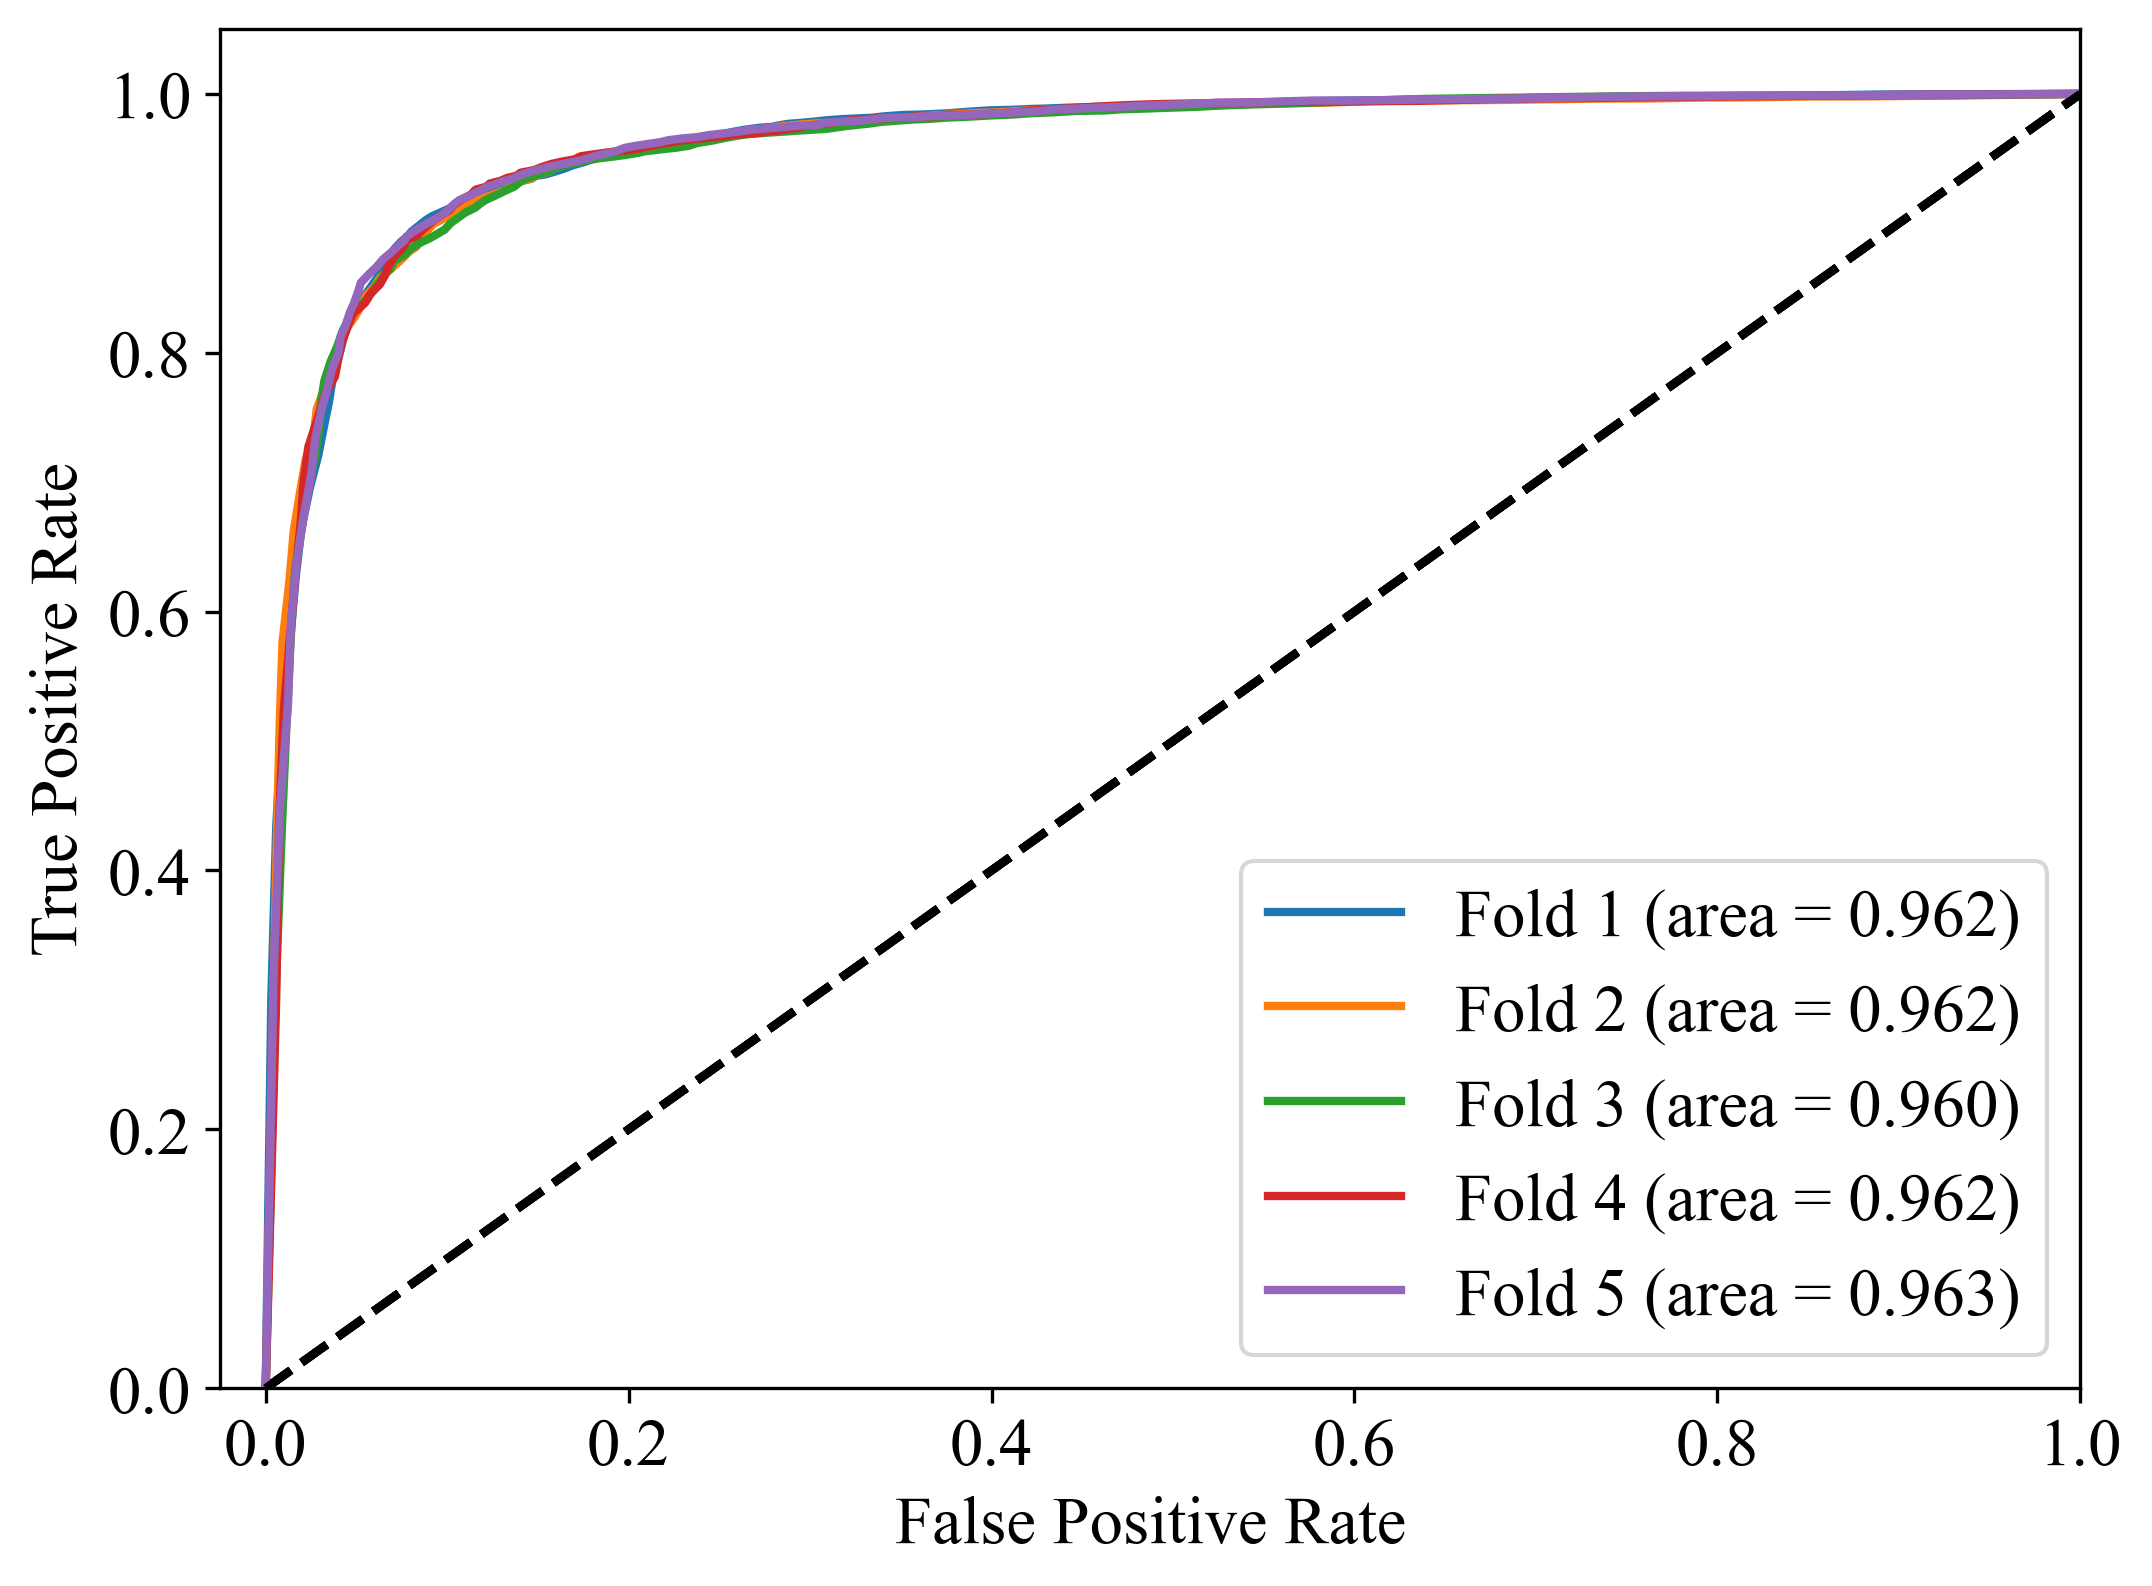

In [10]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
pr_fig, pr_ax = plt.subplots(figsize=(8, 6))
roc_fig, roc_ax = plt.subplots(figsize=(8, 6))
results_df = pd.DataFrame()
results_dicts = []
for i, (train_index, val_index) in enumerate(cv_indices):
    X_train_train, y_train_train = X_train.iloc[train_index], y_train.iloc[train_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
    clf = model
    clf.fit(X_train_train, y_train_train)
    y_score = clf.predict_proba(X_val)[:, 1]
    y_pred = clf.predict(X_val)
    y_val_col_name = f"y_val_{i+1}"
    y_score_col_name = f"y_score_{i+1}"
    y_val_series = pd.Series(y_val, name=y_val_col_name)
    y_score_series = pd.Series(y_score, name=y_score_col_name)
    results_df = pd.concat([results_df, y_val_series, y_score_series], axis=1)
   
    precision, recall, thresholds = precision_recall_curve(y_val, y_score)
    area = auc(recall, precision)
    pr_ax.plot(recall, precision, label='Fold %d (area = %0.3f)' % (i+1, area), lw=2)
    pr_ax.set_xlabel('Recall')
    pr_ax.set_ylabel('Precision')
    pr_ax.set_ylim([0.0, 1.05])
    pr_ax.set_xlim([0.0, 1.0])
    pr_ax.set_title('Precision-Recall Curve')
    pr_ax.legend(loc="lower left")
    

    fpr, tpr, thresholds = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)
    roc_ax.plot(fpr, tpr, label='Fold %d (area = %0.3f)' % (i+1, roc_auc), lw=2)
    roc_ax.plot([0, 1], [0, 1], 'k--', lw=2)
    roc_ax.set_xlabel('False Positive Rate')
    roc_ax.set_ylabel('True Positive Rate')
    roc_ax.set_ylim([0.0, 1.05])
    roc_ax.set_xlim([-0.025, 1.0])
#    roc_ax.set_title('Receiver Operating Characteristic')
    roc_ax.legend(loc="lower right")
    
    results_dicts.append({'model':model,"score":roc_auc})

plt.show()

In [11]:
pr_fig.savefig('./figures/c_Recall.png', dpi=300, bbox_inches='tight')
roc_fig.savefig('./figures/c_ROC.png', dpi=300, bbox_inches='tight')

In [12]:
X_test.columns

Index(['B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char'], dtype='object')

# 这里继续画混淆矩阵

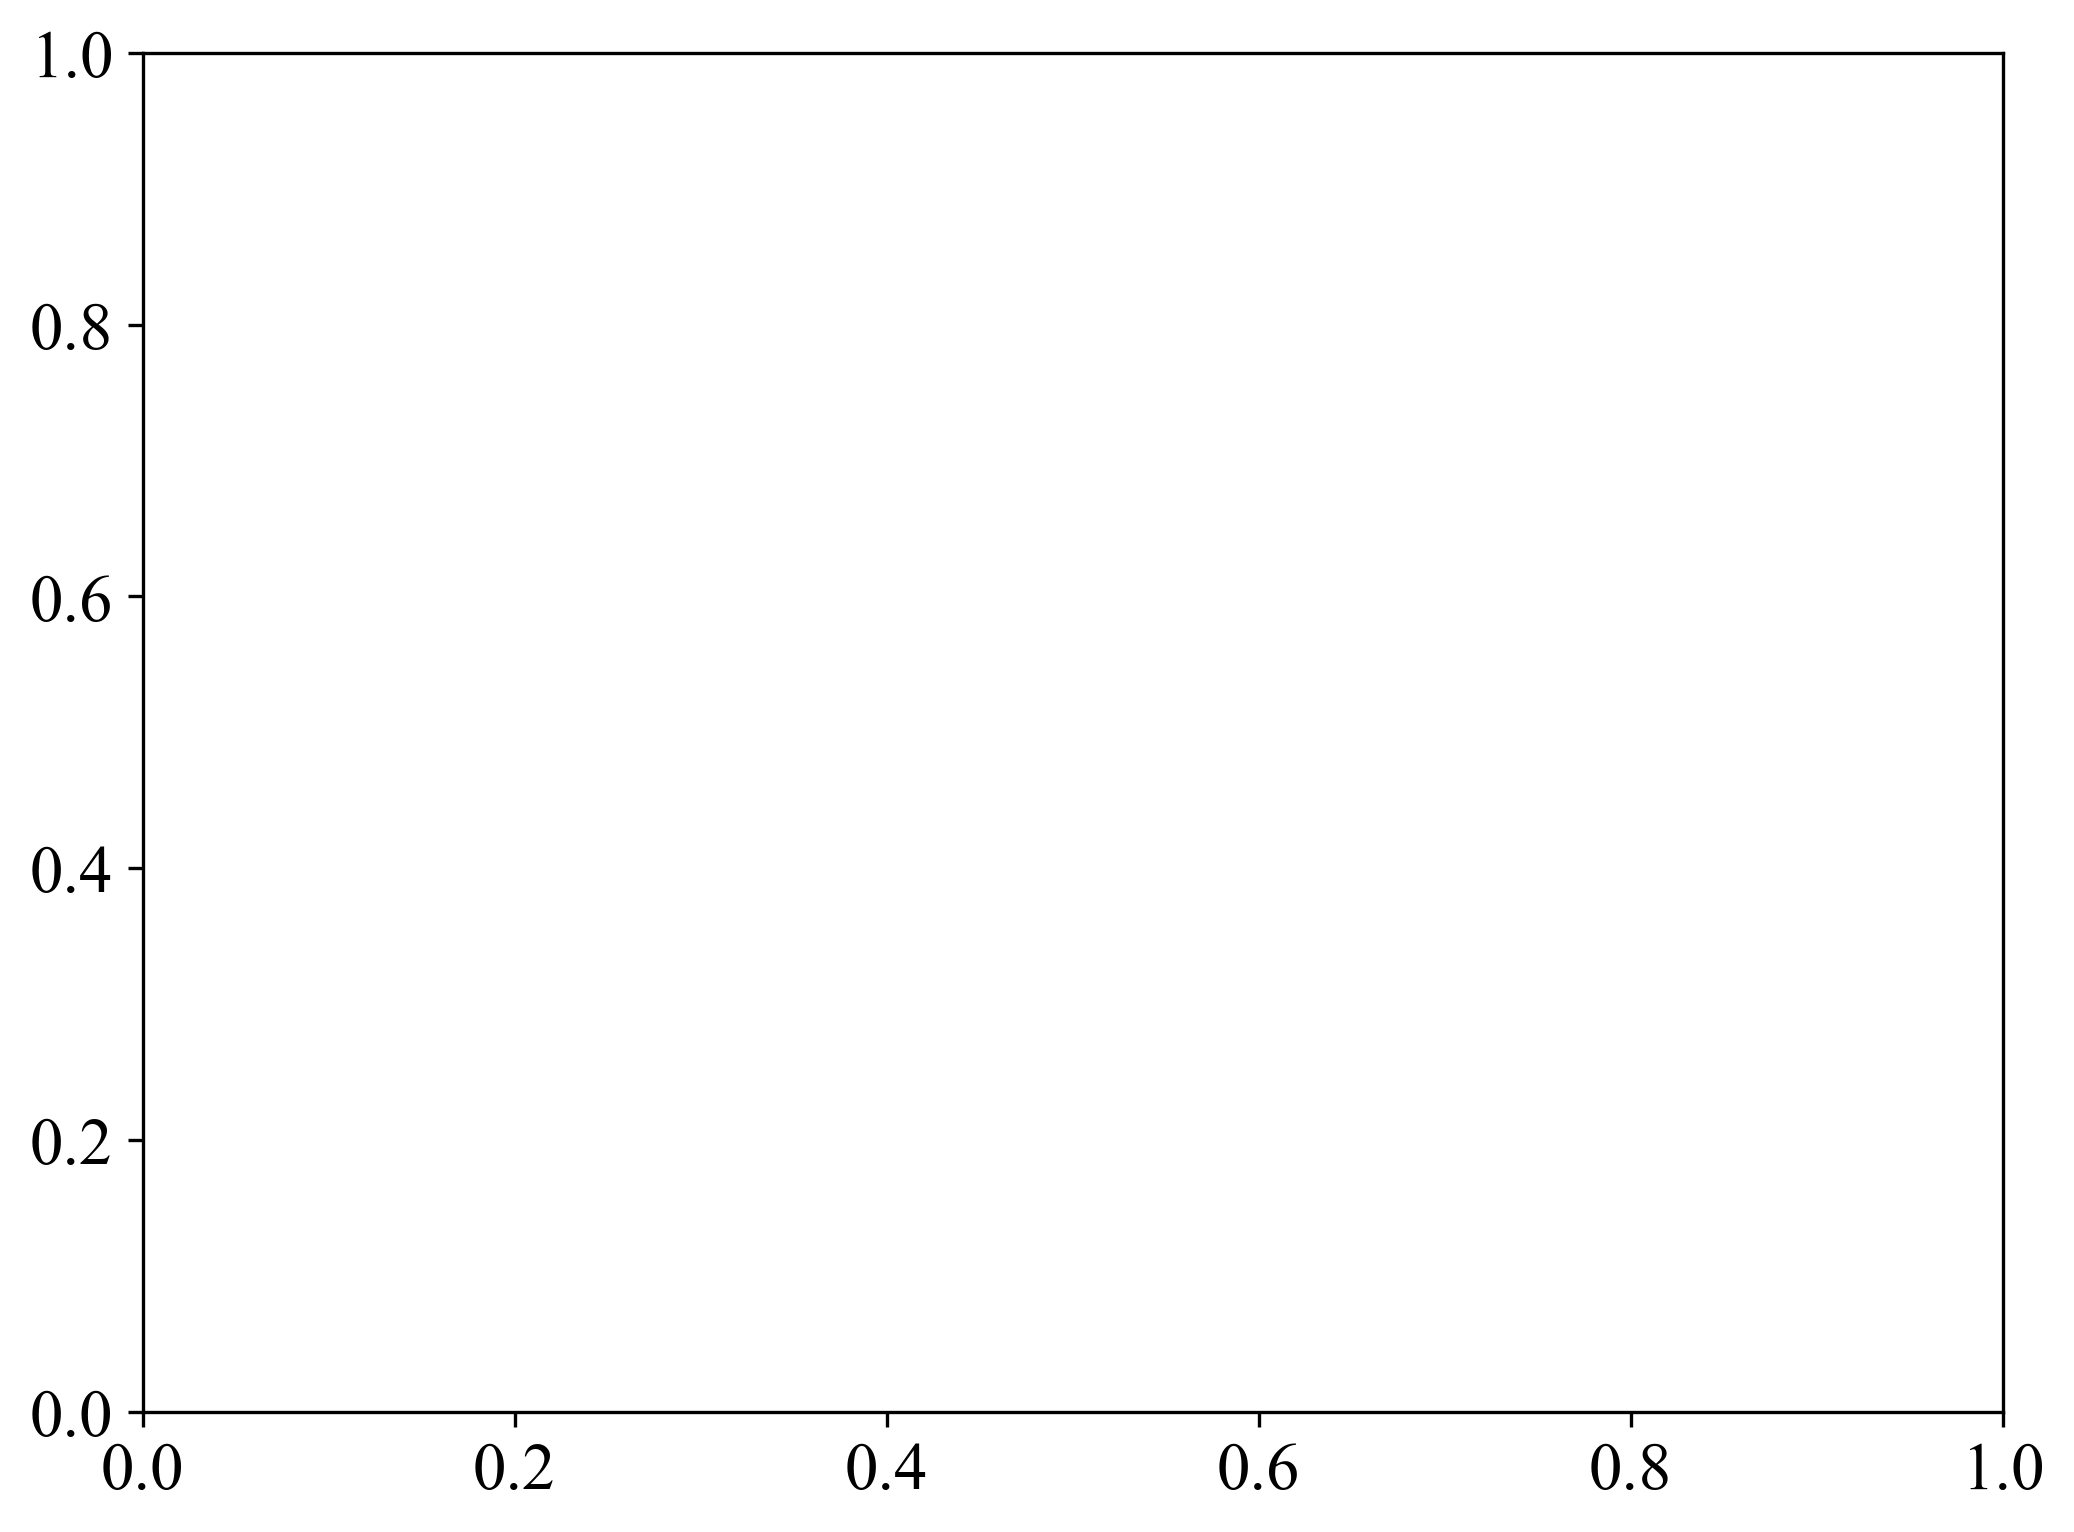

In [22]:
fig, ax = plt.subplots()

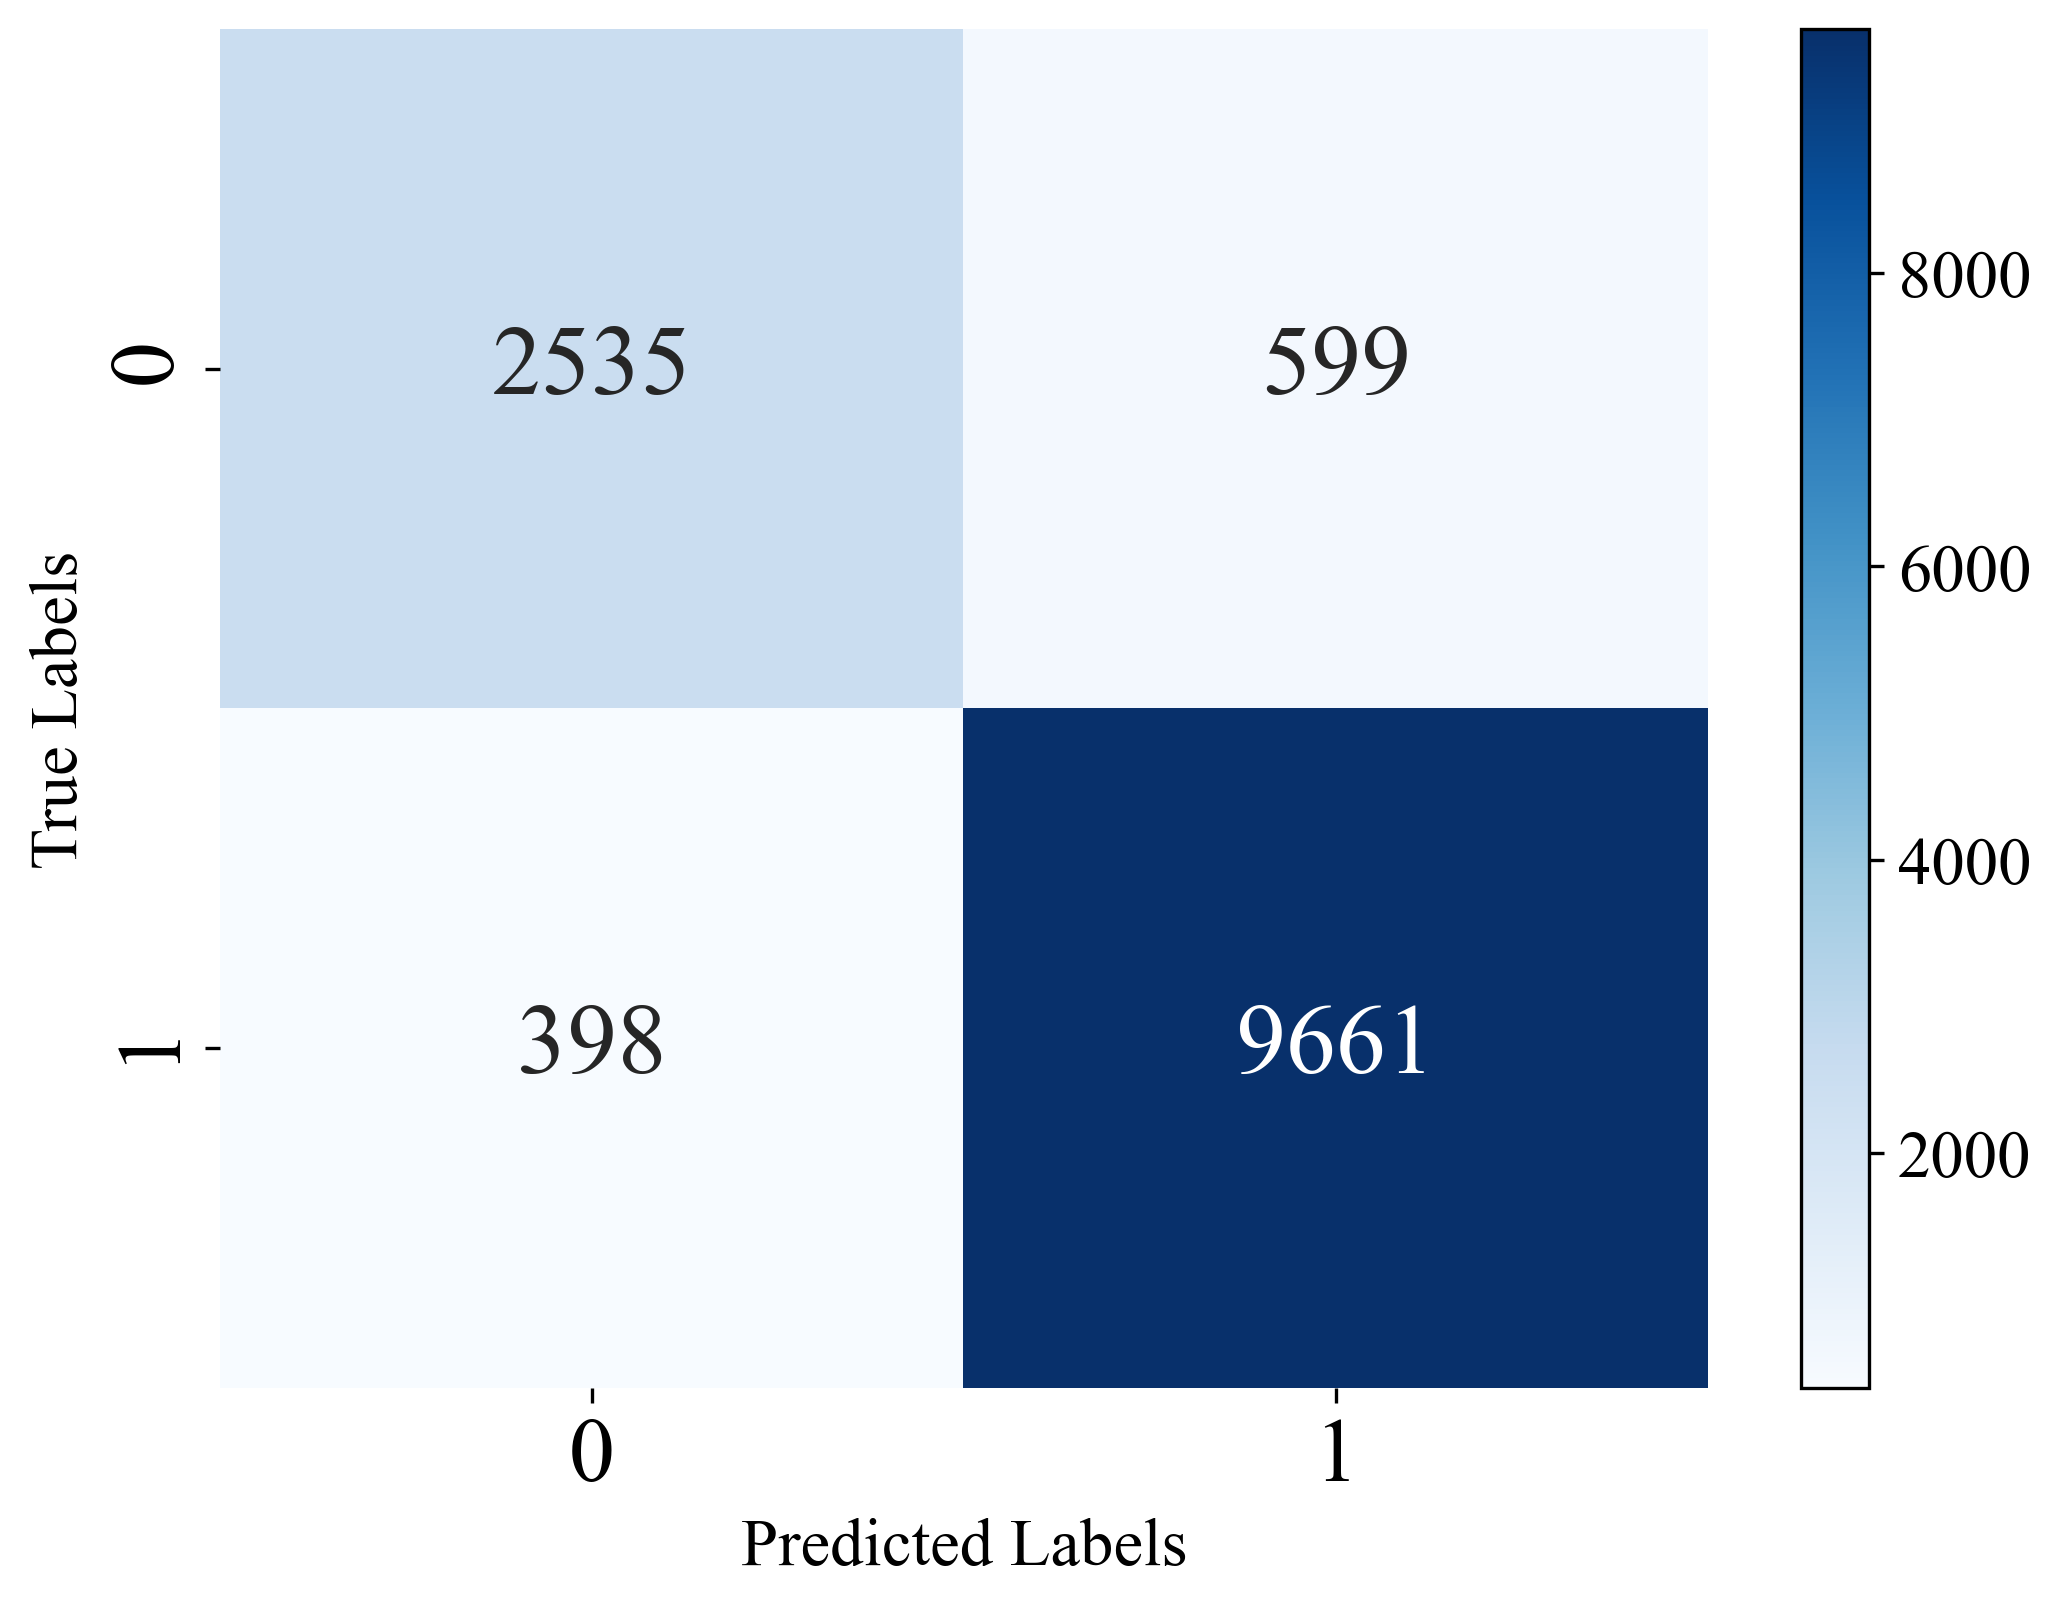

In [24]:
from sklearn.metrics import confusion_matrix

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cax = ax.matshow(conf_matrix, cmap='Blues')
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
#plt.title('Confusion Matrix')
plt.colorbar(cax, cmap='Blues')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('./figures/Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
Eg_df=pd.read_csv('./Data/New_Eg_6.6w.csv')
Eg_df

,formula,hse_fold0,hse_fold1,hse_fold2,hse_fold3,hse_fold4,mean_hse,mean_eh,A_Density,B_Density,X_Density,B_dipole Polarizability,A_number of Valence Electrons,X_number of Valence Electrons,B_number,A_number of s+p Electrons,B_number of s+p Electrons,X_number of s+p Electrons,A_number of d Electrons,X_number of d Electrons,avg ionic char,B_Electronegativity,mean
0,Cs0.47Rb0.53Ca1Cl3,5.809389,5.248012,6.039049,5.751761,5.965189,5.762680,0.107727,1.6898,1.5400,0.00963,160.80,1.0,21.0,20.00,1.0,2.00,21.0,0.0,0.0,0.172973,1.0000,5.891347
1,Cs0.47Rb0.53Sr1Cl3,5.700661,5.061179,5.825304,5.644604,5.909904,5.628331,0.057384,1.6898,2.6400,0.00963,197.20,1.0,21.0,38.00,1.0,2.00,21.0,0.0,0.0,0.174792,0.9500,5.770118
2,Cs0.47Rb0.53Mn1Cl3,2.738756,2.699255,2.715833,2.640517,2.822403,2.723353,0.013267,1.6898,7.4400,0.00963,68.00,1.0,21.0,25.00,1.0,2.00,21.0,0.0,0.0,0.152377,1.5500,2.698590
3,Cs0.47Rb0.53Fe1Cl3,2.821851,2.349560,3.023580,2.866029,0.000000,2.212204,0.080834,1.6898,7.8700,0.00963,62.00,1.0,21.0,26.00,1.0,2.00,21.0,0.0,0.0,0.142088,1.8300,2.765255
4,Cs0.47Rb0.53Pd1Cl3,0.000000,2.958490,0.000000,3.009616,3.122243,1.818070,0.034107,1.6898,12.0000,0.00963,26.14,1.0,21.0,46.00,1.0,0.00,21.0,0.0,0.0,0.130062,2.2000,3.030116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65956,Rb1V0.49Sn0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070500,1.5300,6.7118,9.36000,69.66,1.0,21.0,36.77,1.0,3.02,21.0,0.0,0.0,0.125254,1.7983,0.000000
65957,Rb1V0.49Pb0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063449,1.5300,8.7569,9.36000,66.60,1.0,21.0,53.09,1.0,3.02,21.0,0.0,0.0,0.121586,1.9870,0.000000
65958,Rb1Eu0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064295,1.5300,5.6663,9.36000,136.47,1.0,21.0,43.40,1.0,2.00,21.0,0.0,0.0,0.139952,1.4107,0.000000
65959,Rb1Tm0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036594,1.5300,7.7471,9.36000,116.07,1.0,21.0,46.46,1.0,2.00,21.0,0.0,0.0,0.138803,1.4362,0.000000


### 下面补充随机森林分类器的28集分类效果图：

In [4]:
Eg_df['Metal_or_not'] = Eg_df['mean'].apply(lambda x: 0 if x <= 0.1 else 1)
Eg_df

,formula,hse_fold0,hse_fold1,hse_fold2,hse_fold3,hse_fold4,mean_hse,mean_eh,A_Density,B_Density,X_Density,B_dipole Polarizability,A_number of Valence Electrons,X_number of Valence Electrons,B_number,A_number of s+p Electrons,B_number of s+p Electrons,X_number of s+p Electrons,A_number of d Electrons,X_number of d Electrons,avg ionic char,B_Electronegativity,mean,Metal_or_not
0,Cs0.47Rb0.53Ca1Cl3,5.809389,5.248012,6.039049,5.751761,5.965189,5.762680,0.107727,1.6898,1.5400,0.00963,160.80,1.0,21.0,20.00,1.0,2.00,21.0,0.0,0.0,0.172973,1.0000,5.891347,1
1,Cs0.47Rb0.53Sr1Cl3,5.700661,5.061179,5.825304,5.644604,5.909904,5.628331,0.057384,1.6898,2.6400,0.00963,197.20,1.0,21.0,38.00,1.0,2.00,21.0,0.0,0.0,0.174792,0.9500,5.770118,1
2,Cs0.47Rb0.53Mn1Cl3,2.738756,2.699255,2.715833,2.640517,2.822403,2.723353,0.013267,1.6898,7.4400,0.00963,68.00,1.0,21.0,25.00,1.0,2.00,21.0,0.0,0.0,0.152377,1.5500,2.698590,1
3,Cs0.47Rb0.53Fe1Cl3,2.821851,2.349560,3.023580,2.866029,0.000000,2.212204,0.080834,1.6898,7.8700,0.00963,62.00,1.0,21.0,26.00,1.0,2.00,21.0,0.0,0.0,0.142088,1.8300,2.765255,1
4,Cs0.47Rb0.53Pd1Cl3,0.000000,2.958490,0.000000,3.009616,3.122243,1.818070,0.034107,1.6898,12.0000,0.00963,26.14,1.0,21.0,46.00,1.0,0.00,21.0,0.0,0.0,0.130062,2.2000,3.030116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65956,Rb1V0.49Sn0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070500,1.5300,6.7118,9.36000,69.66,1.0,21.0,36.77,1.0,3.02,21.0,0.0,0.0,0.125254,1.7983,0.000000,0
65957,Rb1V0.49Pb0.51Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063449,1.5300,8.7569,9.36000,66.60,1.0,21.0,53.09,1.0,3.02,21.0,0.0,0.0,0.121586,1.9870,0.000000,0
65958,Rb1Eu0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064295,1.5300,5.6663,9.36000,136.47,1.0,21.0,43.40,1.0,2.00,21.0,0.0,0.0,0.139952,1.4107,0.000000,0
65959,Rb1Tm0.51V0.49Br3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036594,1.5300,7.7471,9.36000,116.07,1.0,21.0,46.46,1.0,2.00,21.0,0.0,0.0,0.138803,1.4362,0.000000,0


In [5]:
from sklearn.model_selection import train_test_split
X = Eg_df.iloc[:, 8:-2]
y = Eg_df['Metal_or_not']
y.value_counts()

1    49861
0    16100
Name: Metal_or_not, dtype: int64

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X_train.shape,X_test.shape)

(52768, 14) (13193, 14)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
data_numbers = []
roc_auc_scores = []
RFC = RandomForestClassifier(n_jobs=-1,random_state=42)
metal = Eg_df[Eg_df['Metal_or_not']==0]
non_metal = Eg_df[Eg_df['Metal_or_not']!=0]
max_n = min(len(metal),len(non_metal))
for n in  tqdm(np.linspace(100,max_n,100)):
    index_sample = metal.sample(int(n/2),random_state=42).index.append(non_metal.sample(int(n/2),random_state=42).index)
    X_sample = X.loc[index_sample]
    y_sample = y.loc[index_sample]
    data_numbers.append(n)
    roc_auc_scores.append(cross_val_score(RFC,X_sample,y_sample,cv=5,scoring="roc_auc",n_jobs=-1).mean())

100%|██████████| 100/100 [01:00<00:00,  1.65it/s]


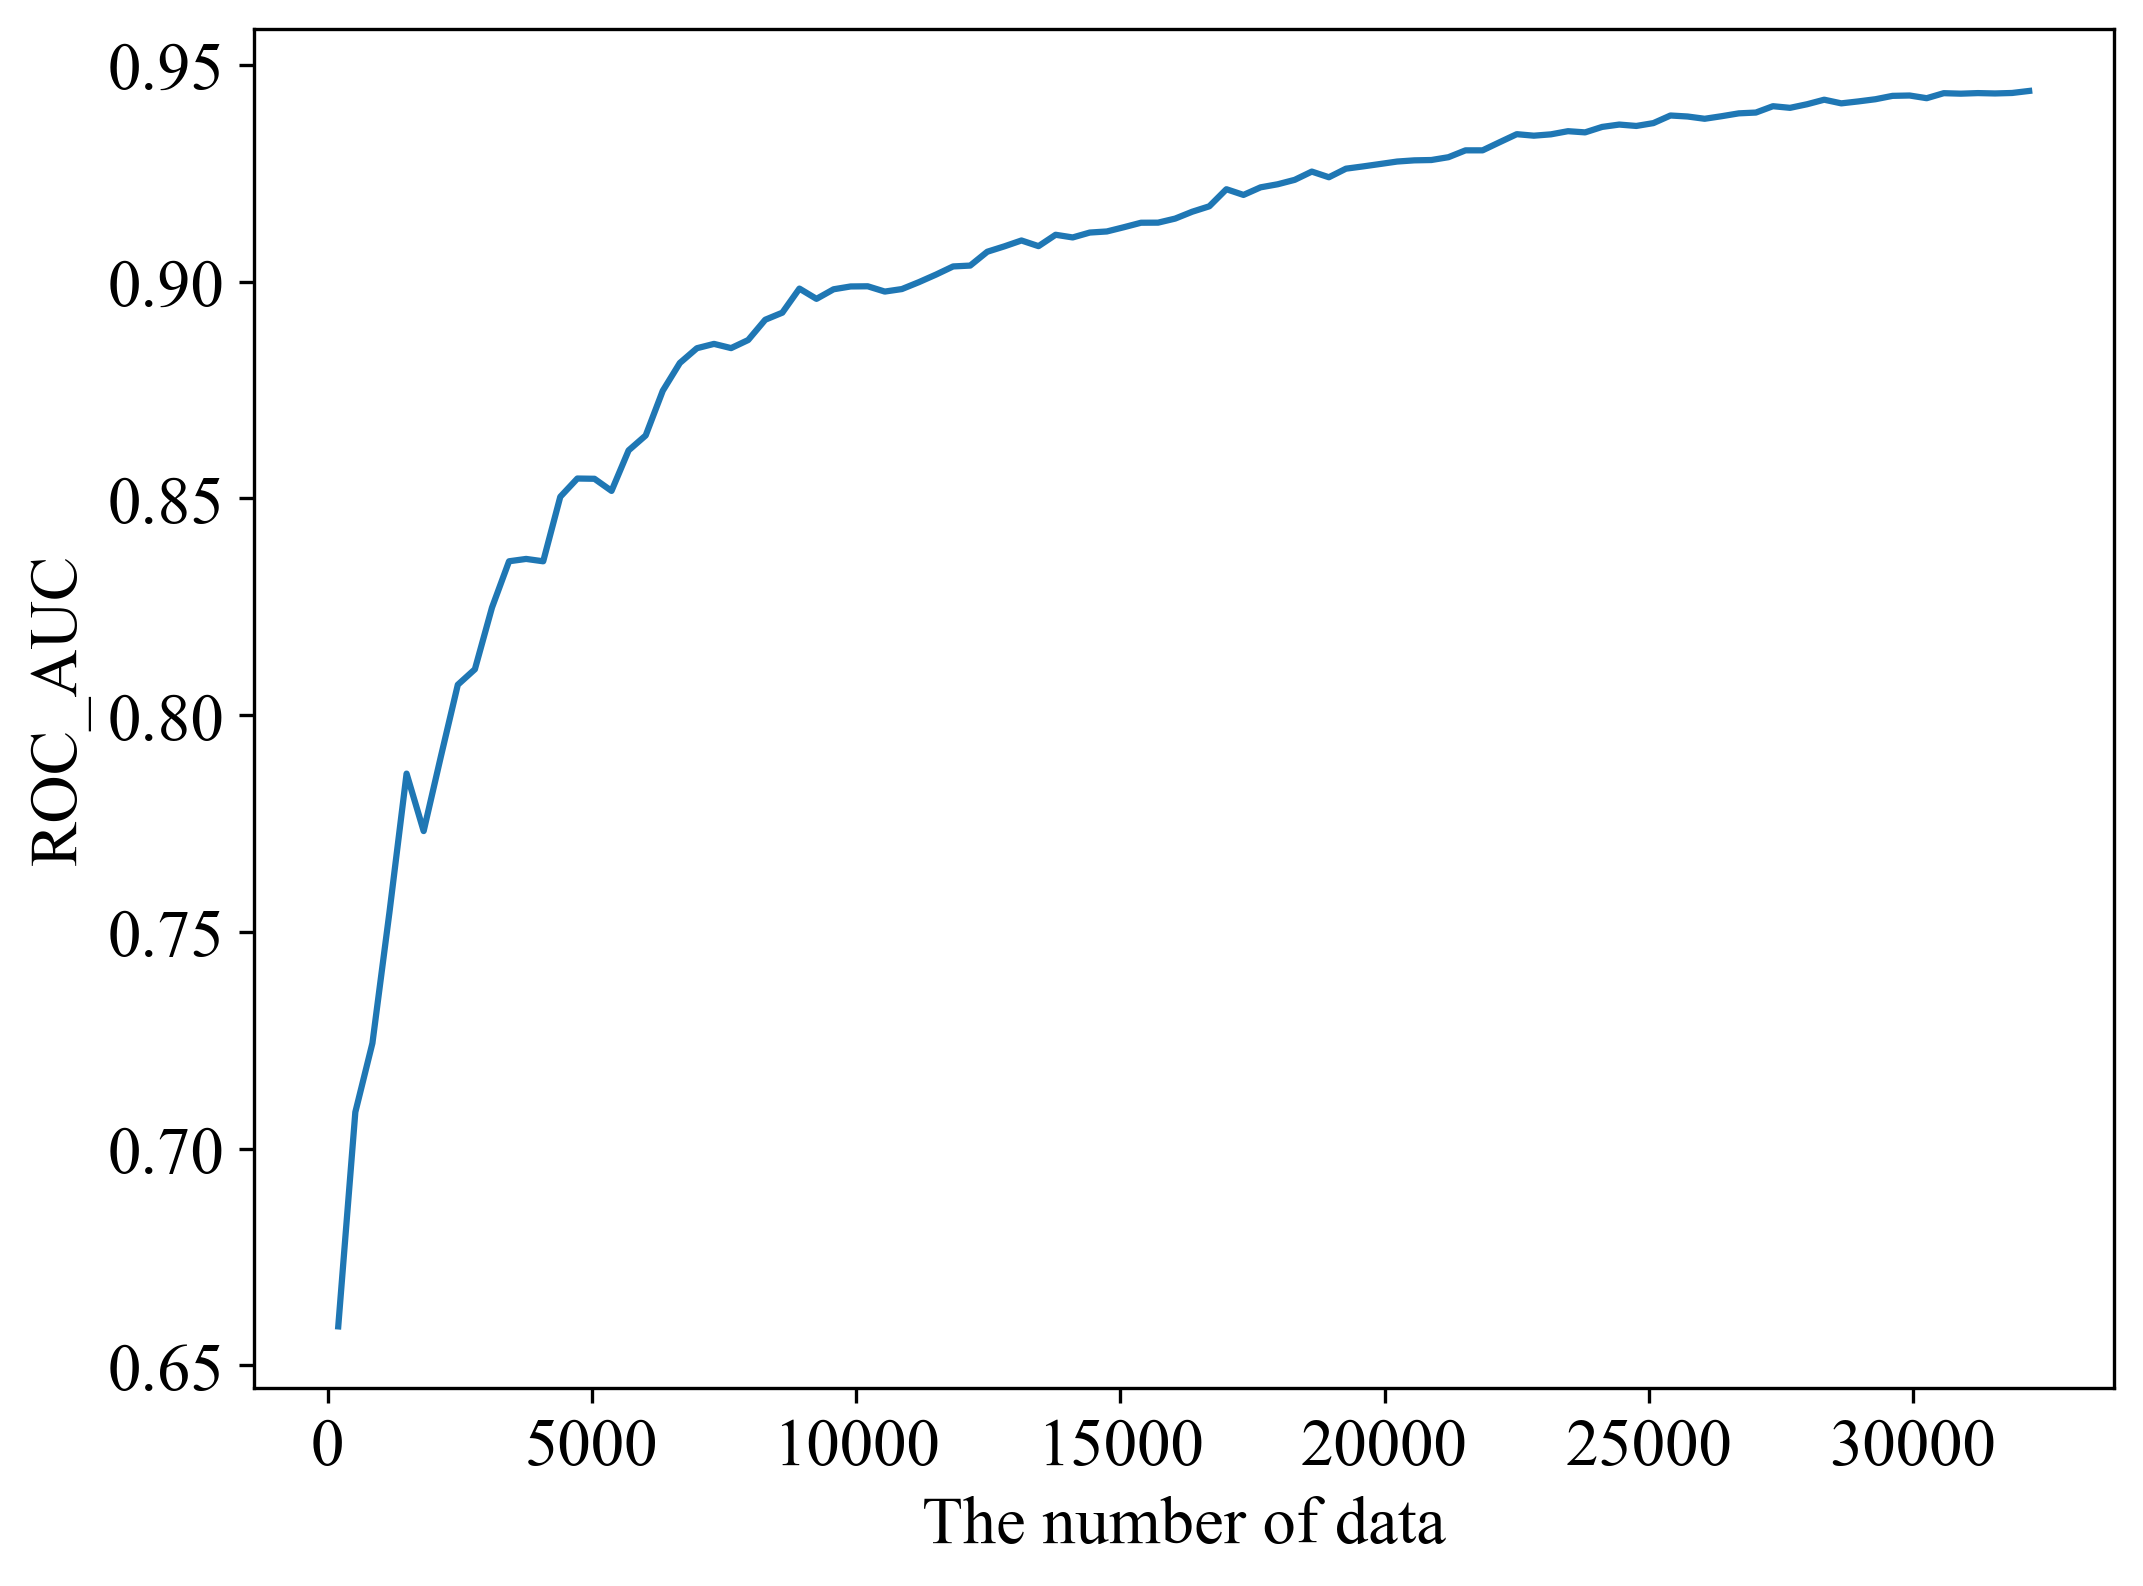

In [9]:
plt.plot([i*2 for i in data_numbers],roc_auc_scores,)
plt.xlabel("The number of data")
plt.ylabel("ROC_AUC")
plt.show()

In [11]:
from sklearn.feature_selection import SelectFromModel
RFC = RandomForestClassifier(n_jobs=-1,random_state=42)
RFC.fit(X_train, y_train)
feature_importance=pd.DataFrame()
feature_importance['features'] = X.columns
feature_importance['feature_importances'] = RFC.feature_importances_
threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(model,threshold=i)
    X_embedded = selector.fit_transform(X_train, y_train)
    once = cross_val_score(RFC,X_embedded,y_train,cv=5,scoring="roc_auc",n_jobs=9).mean()#交叉验证
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X.columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


,col,score,n_features
0,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
1,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
2,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
3,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
4,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.965754,14
5,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.969553,9
6,"Index(['A_Density', 'B_Density', 'X_Density', ...",0.967697,8
7,"Index(['A_Density', 'B_Density', 'B_dipole Pol...",0.970194,7
8,"Index(['B_Density', 'B_dipole Polarizability',...",0.968486,6
9,"Index(['B_Density', 'B_dipole Polarizability',...",0.965384,5


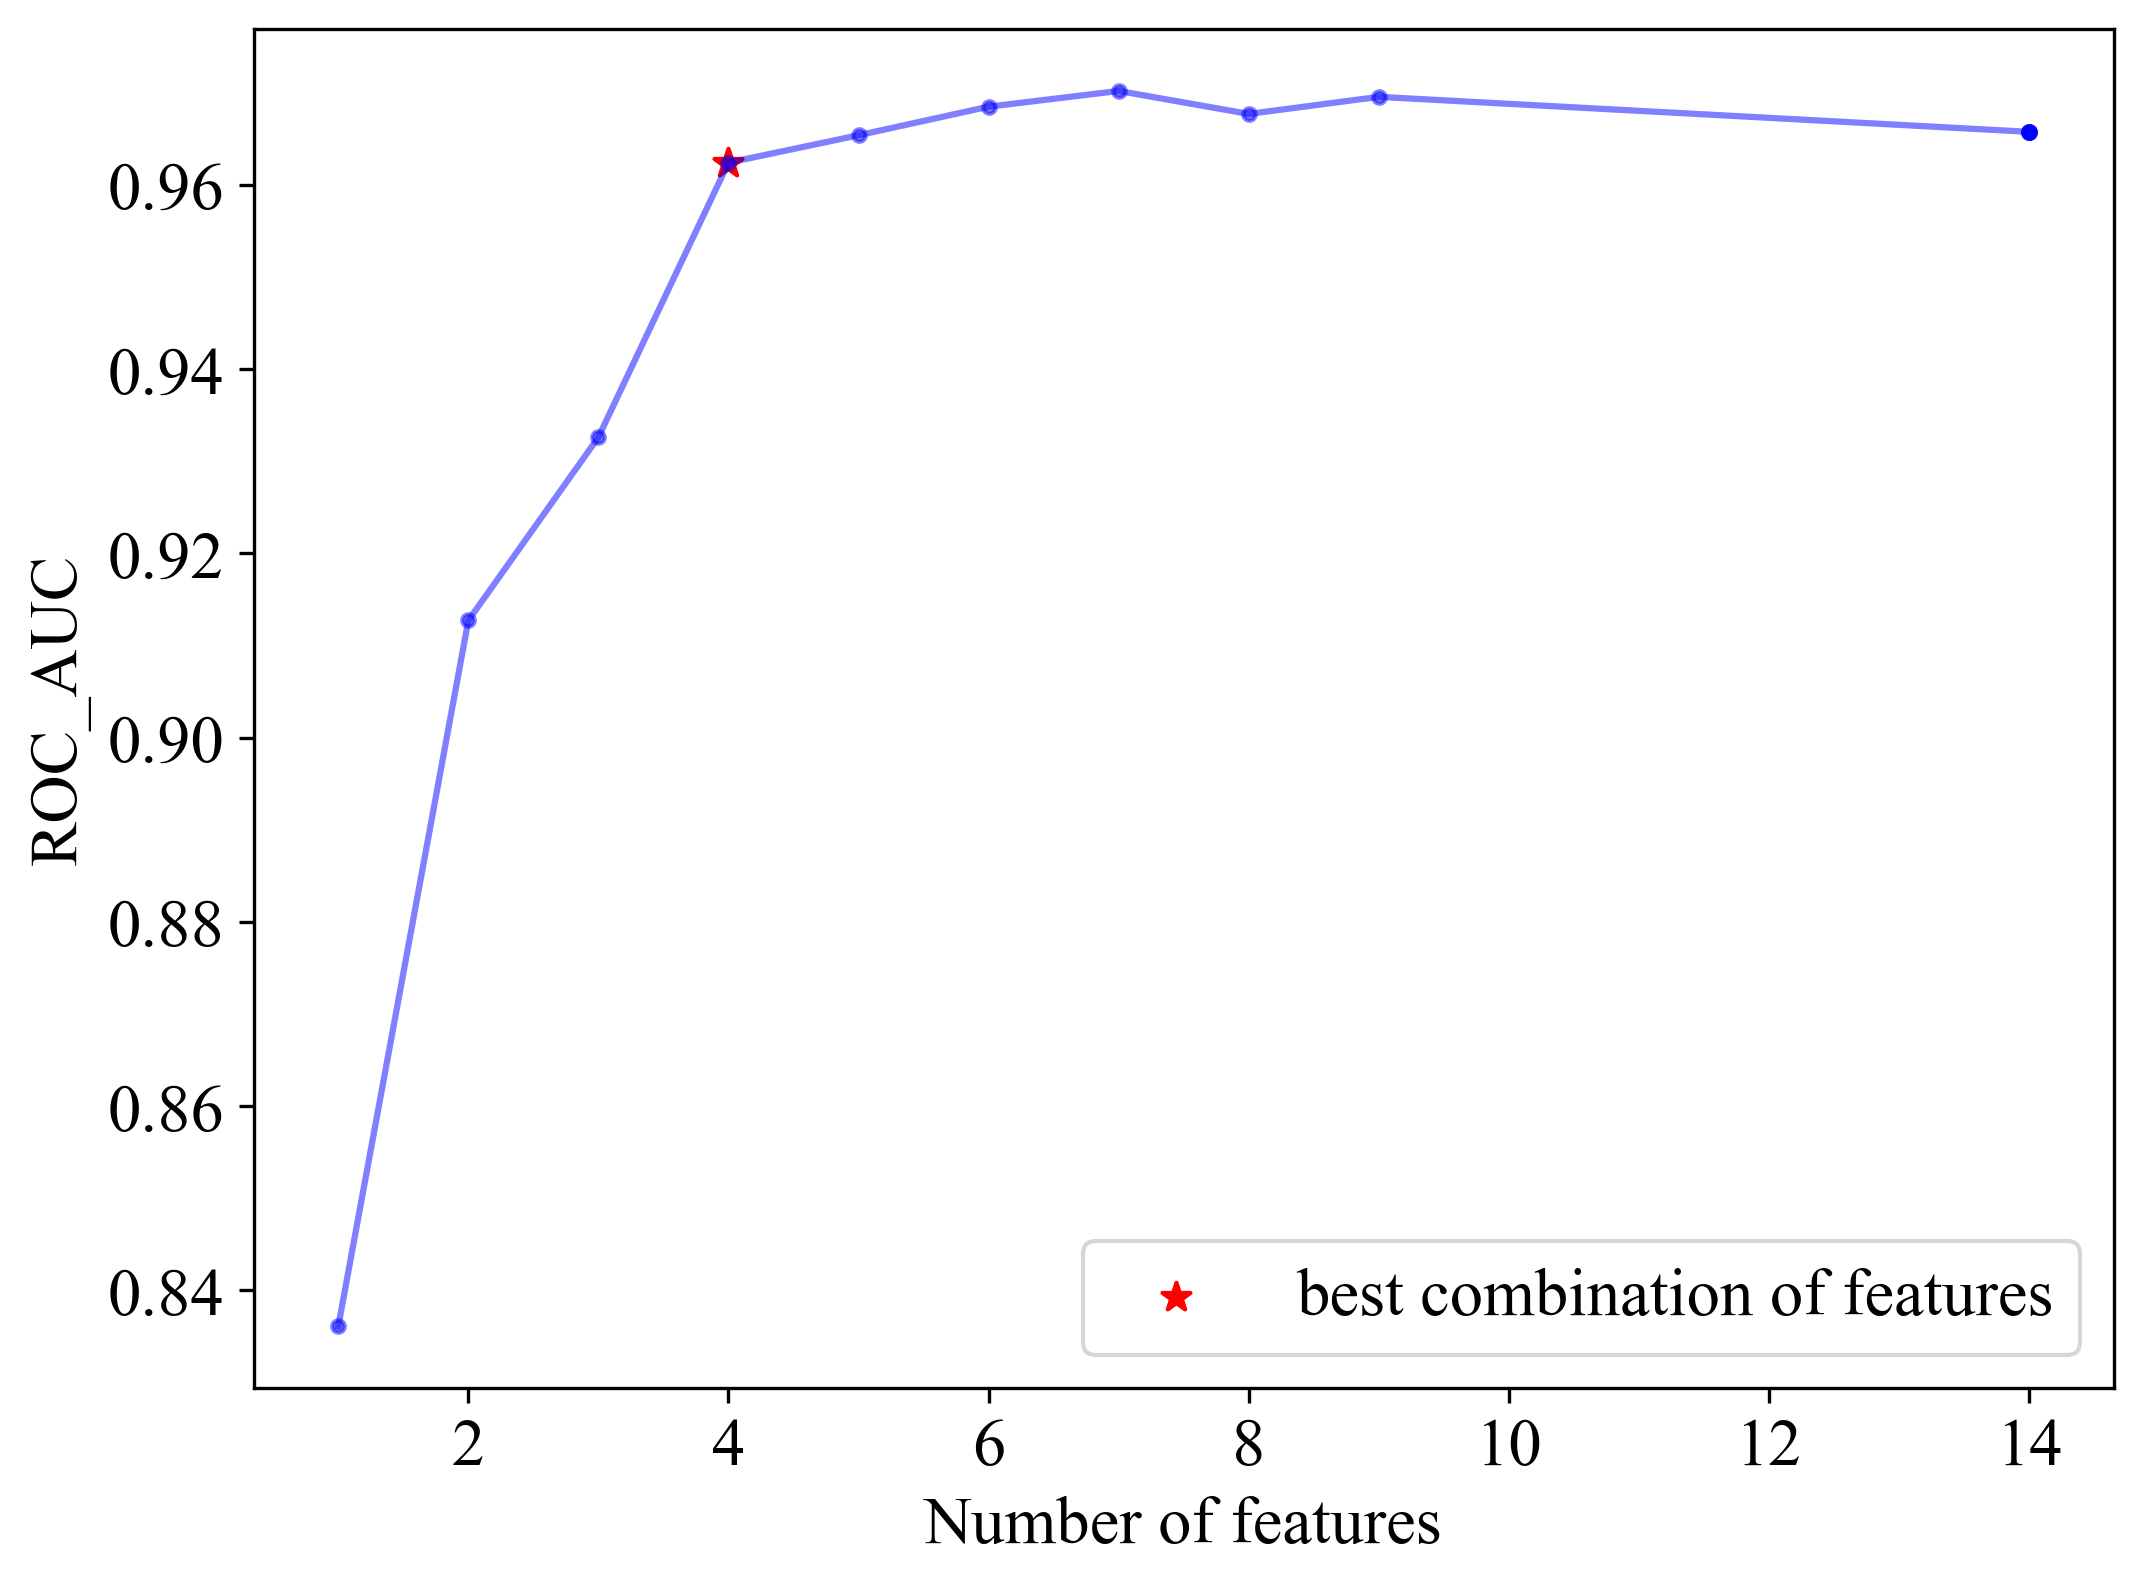

In [12]:
f_fig, f_ax = plt.subplots(figsize=(8, 6))
to_select = result[result['score']>0.96]
to_select = to_select.sort_values(by='n_features',ascending=True)
f_ax.scatter(to_select.iloc[0]['n_features'],to_select.iloc[0]['score'],marker='*',
            s=50,c='r',label='best combination of features')
f_ax.plot(n_features,score, color='b',marker='.',alpha=0.5)
# plt.axhline(y=to_select.iloc[0]['score'],linestyle="--",color='grey')
# plt.axvline(x=to_select.iloc[0]['n_features'],linestyle="--",color='grey')
f_ax.set_xlabel("Number of features"), plt.ylabel("ROC_AUC")
f_ax.legend()
plt.show()

In [13]:
feature_labels = to_select.iloc[0]['col']
X_train = X.loc[X_train.index][feature_labels]
X_test = X.loc[X_test.index][feature_labels]
X_train.shape, X_test.shape

((52768, 4), (13193, 4))

In [14]:
X_test.columns

Index(['B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char'], dtype='object')

In [15]:
from sklearn.metrics import accuracy_score
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92442962176912


In [25]:
data_val = pd.read_csv('./Data/df_28.csv')
data_val = data_val[['formula','target','B_Density', 'B_dipole Polarizability', 'B_number', 'avg ionic char']]
data_val

,formula,target,B_Density,B_dipole Polarizability,B_number,avg ionic char
0,RbFeCl3,0.000000,7.87,62.00,26,0.141365
1,CsTmCl3,0.000000,9.32,144.00,69,0.164389
2,RbPdCl3,0.000000,12.00,26.14,46,0.129320
3,CsPdCl3,0.000000,12.00,26.14,46,0.130894
4,CsSrCl3,6.254735,2.64,197.20,38,0.175397
5,RbEuCl3,1.672559,5.24,184.00,63,0.164963
6,CsCaBr3,5.729195,1.54,160.80,20,0.157534
7,CsEuCl3,1.674355,5.24,184.00,63,0.166251
8,CsYbCl3,6.628890,6.97,139.00,70,0.169945
9,RbPbCl3,2.962986,11.30,47.00,82,0.125838


In [26]:
data_val['is_metal'] = data_val['target'].apply(lambda x: 0 if x <= 0.1 else 1)
data_val

,formula,target,B_Density,B_dipole Polarizability,B_number,avg ionic char,is_metal
0,RbFeCl3,0.000000,7.87,62.00,26,0.141365,0
1,CsTmCl3,0.000000,9.32,144.00,69,0.164389,0
2,RbPdCl3,0.000000,12.00,26.14,46,0.129320,0
3,CsPdCl3,0.000000,12.00,26.14,46,0.130894,0
4,CsSrCl3,6.254735,2.64,197.20,38,0.175397,1
5,RbEuCl3,1.672559,5.24,184.00,63,0.164963,1
6,CsCaBr3,5.729195,1.54,160.80,20,0.157534,1
7,CsEuCl3,1.674355,5.24,184.00,63,0.166251,1
8,CsYbCl3,6.628890,6.97,139.00,70,0.169945,1
9,RbPbCl3,2.962986,11.30,47.00,82,0.125838,1


In [27]:
X_val = data_val.iloc[:, 2:-1]
y_val = data_val['is_metal']
print(X_val.shape)
print(y_val.shape)

(28, 4)
(28,)


In [28]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8571428571428571


In [29]:
formula = data_val['formula']
data_dict = {'formula': formula, 'y_val': y_val, 'y_pred': y_pred}
df_c = pd.DataFrame(data_dict)
df_c

,formula,y_val,y_pred
0,RbFeCl3,0,0
1,CsTmCl3,0,0
2,RbPdCl3,0,0
3,CsPdCl3,0,0
4,CsSrCl3,1,1
5,RbEuCl3,1,1
6,CsCaBr3,1,1
7,CsEuCl3,1,1
8,CsYbCl3,1,0
9,RbPbCl3,1,1


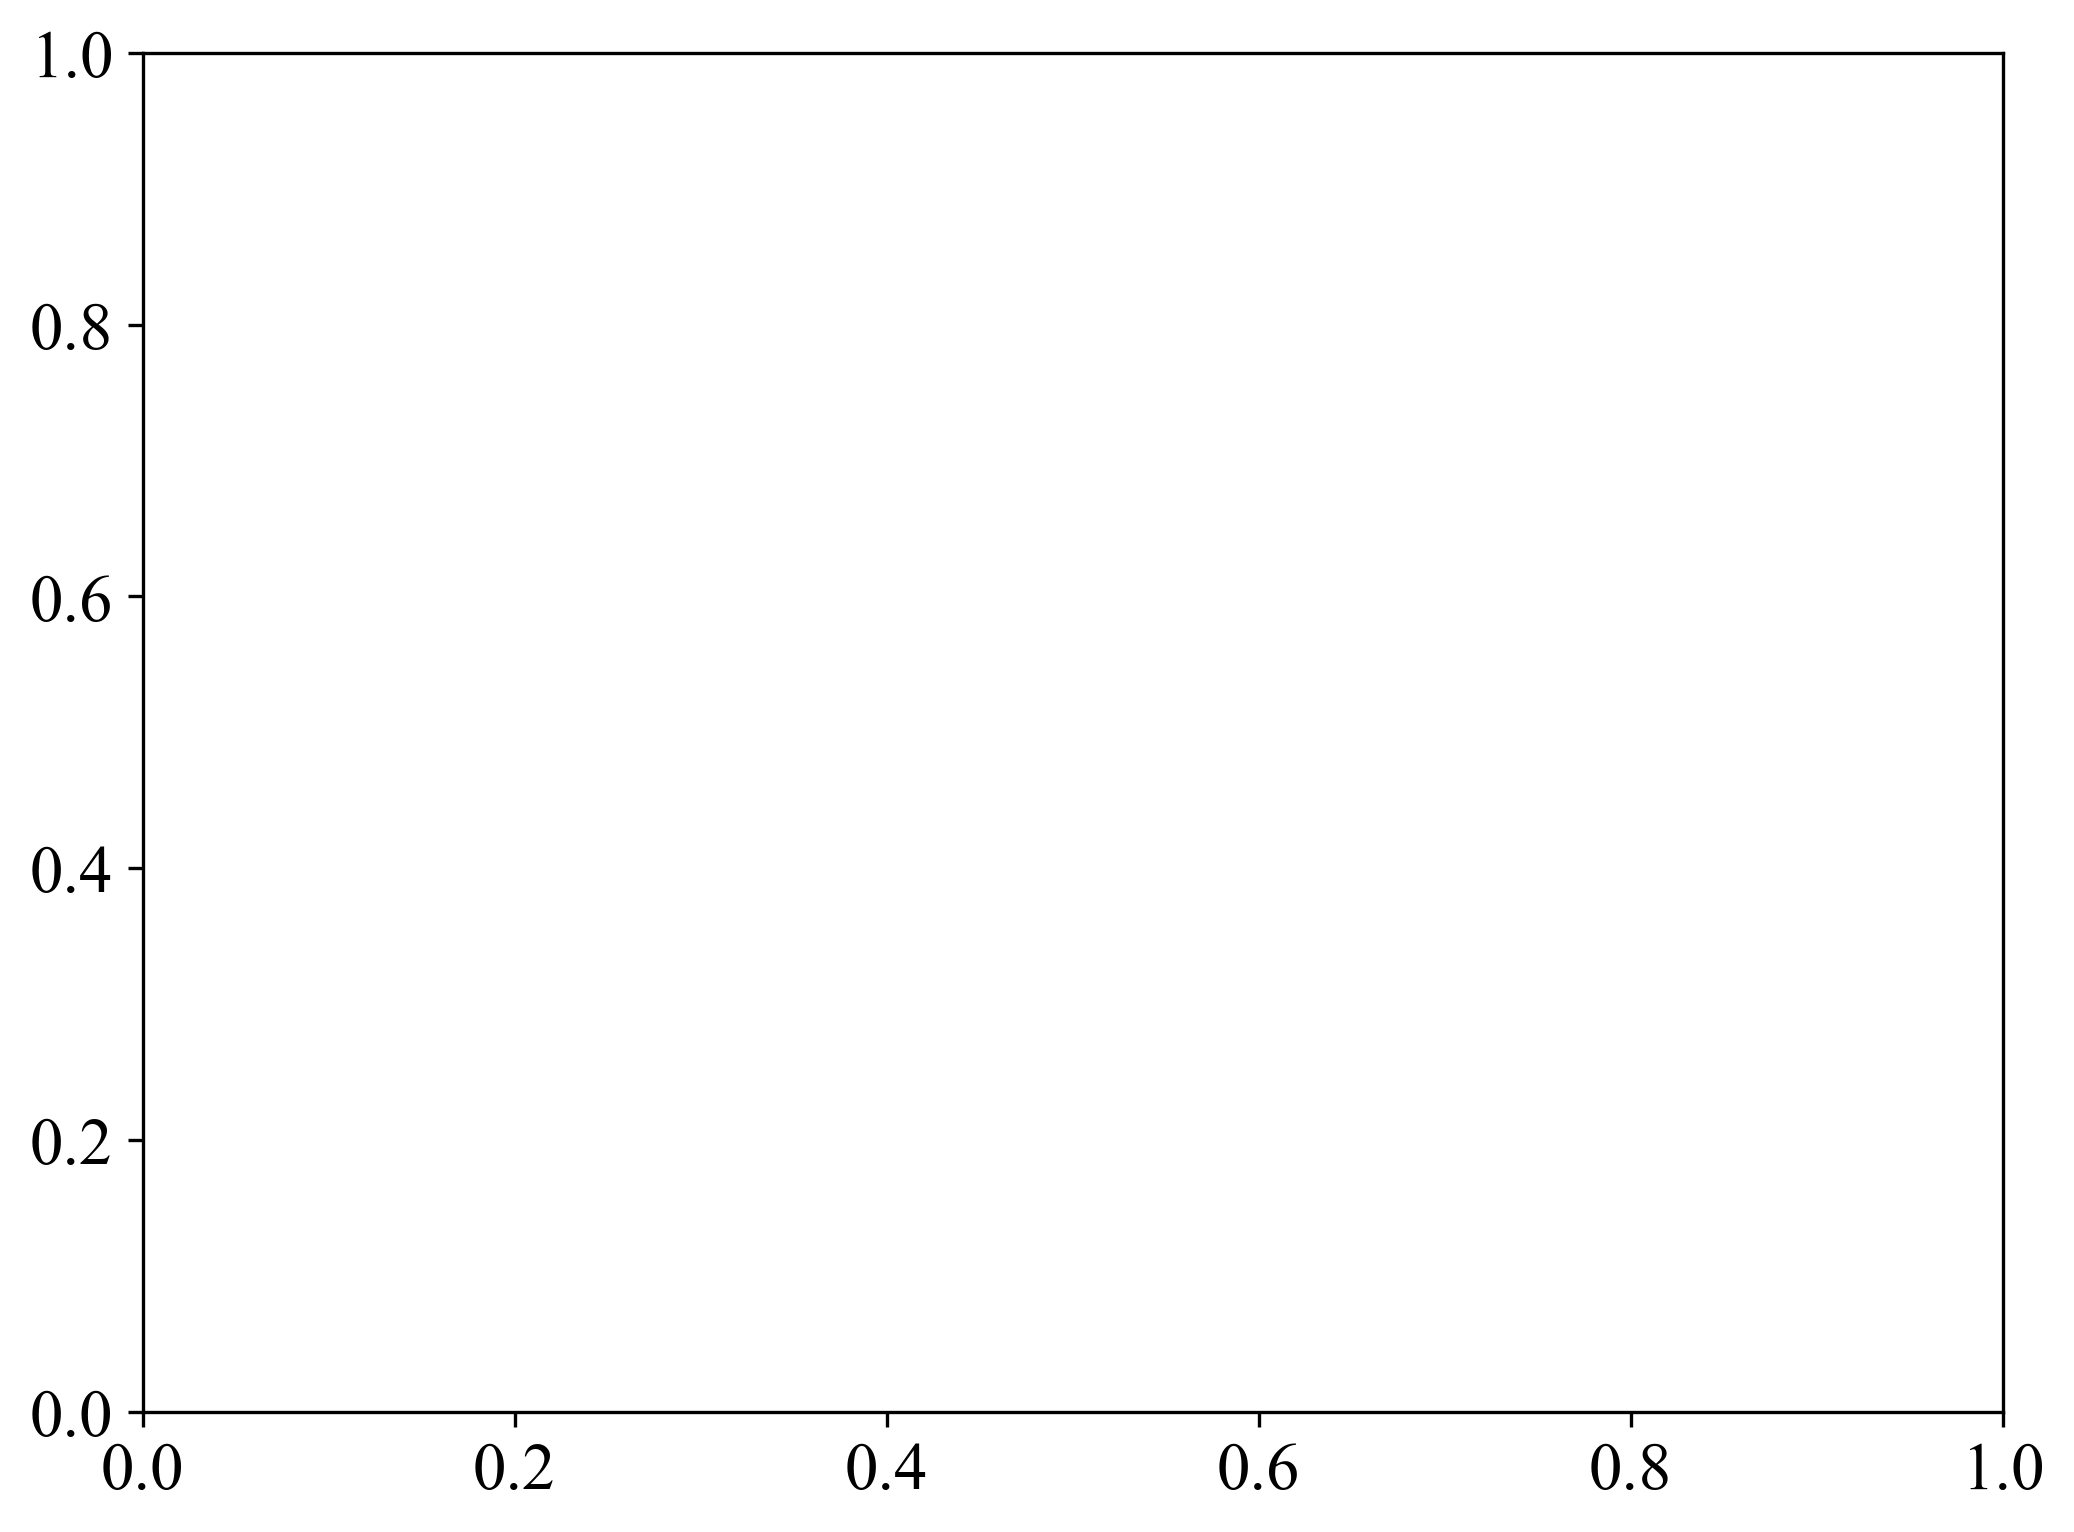

In [21]:
fig, ax = plt.subplots()

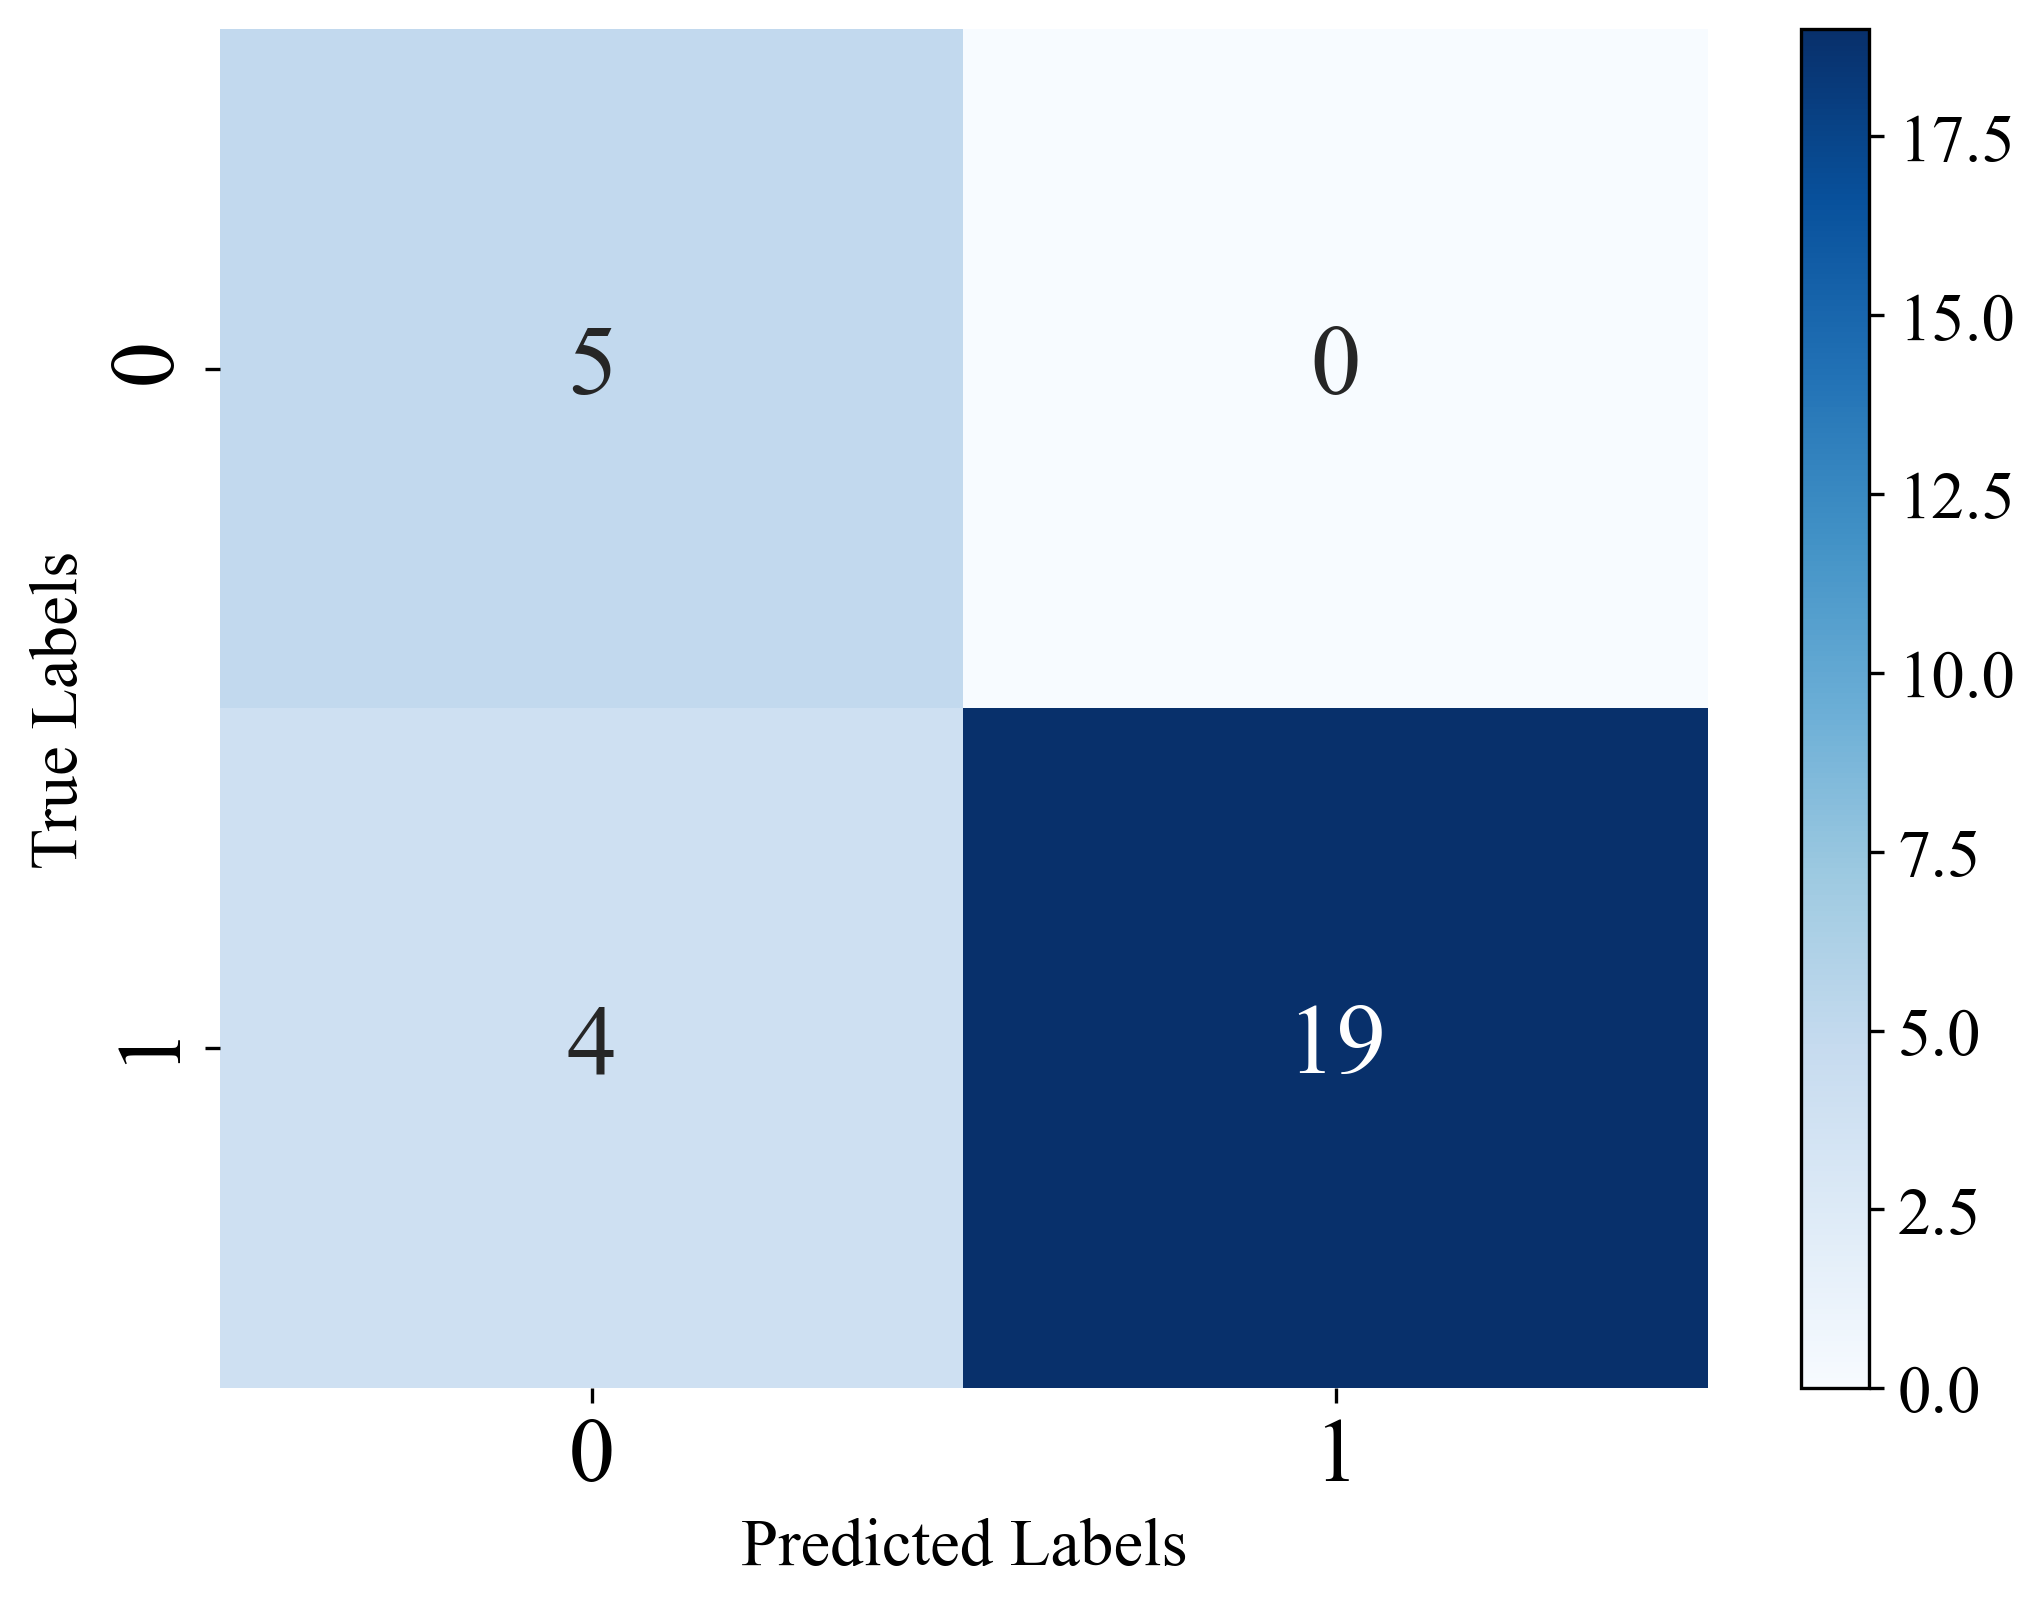

In [31]:
from sklearn.metrics import confusion_matrix

#RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)
cax = ax.matshow(conf_matrix, cmap='Blues')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
#plt.title('Confusion Matrix')
plt.colorbar(cax, cmap='Blues')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('./figures/28_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()